# Introduction to Machine Learning


Machine learning is about learning models with data. Firstly, definitions:

 * **Features** set of $N$ vectors $\{\vec{x}_i\}$ of dimension $D$. Can be reals, integers, classes, etc.
 * **Labels** set of $N$ integers or reals $\{y_i\}$, almost always of dimension $Y$
 * **Labeled Data** set of $N$ tuples $\{\left(\vec{x}, y\right)_i\}$ 
 * **Unlabeled Data** set of $N$ features that may have unknown $y$ labels
 
 Now let's see how these data are used to create models.

## Supervised Learning


Let's see some classic supervised learning methods. We'll be using a dataset from AqSolDB{cite}`Sorkun2019` that is about 10,000 unique compounds with solubility in water. The dataset also includes molecular features that we can use for machine learning.

```{note}
The hidden cells below sets-up our imports
```

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import rdkit
sns.set_context('notebook')
sns.set_style('dark',  {'xtick.bottom':True, 'ytick.left':True, 'xtick.color': '#333333', 'ytick.color': '#333333'})
color_cycle = ['#1BBC9B', '#F06060', '#8CBEB2', '#5C4B51', '#F3B562']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_cycle) 

In [90]:
# load data
soldata = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3407241?format=original&gbrecs=true')
soldata.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


### Data Exploration
We can see that there are a number of features like molecular weight, rotatable bonds, valence electrons, etc. And of course, there is the label **solubility**. One of the first things we should always do is get familiar with our data. Let's just see some specific example, extremes, and get a sense of the range of labels/data. We'll start with seeing what kind of molecules there are.

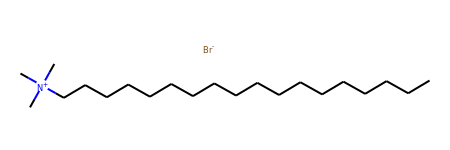

In [91]:
# plot one molecule

mol = rdkit.Chem.MolFromInchi(soldata.InChI[0])
mol

Let's now look at the extreme values to get a sense of the **range** of solubility data and the molecules that make it. First, we'll histogram the solubillity which tells us about the shape of its probability distribution and the extreme values.

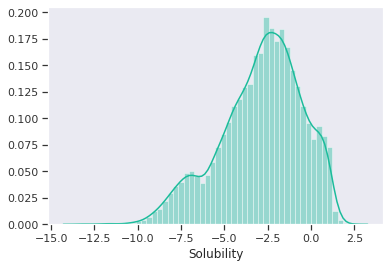

In [92]:
sns.distplot(soldata.Solubility)
plt.show()

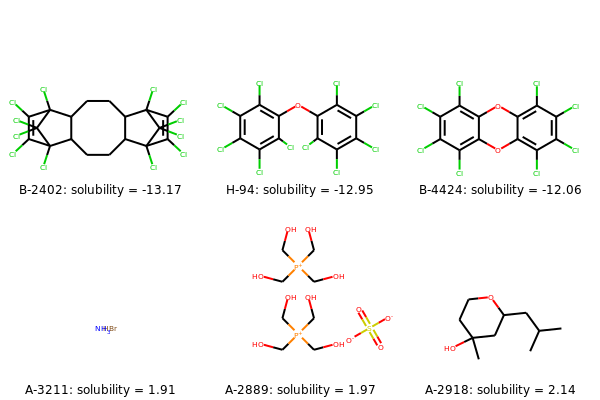

In [93]:
# get 3 lowest and 3 highest solubilities
soldata_sorted = soldata.sort_values('Solubility')
extremes = pd.concat( [soldata_sorted[:3], soldata_sorted[-3:]] )

# pardon this slop, we need to have a list of strings for legends
legend_text = [f'{i}: solubility = {s:.2f}' for i,s in zip(extremes.ID, extremes.Solubility)]

# now plot them on a grid
extreme_mols = [rdkit.Chem.MolFromInchi(inchi) for inchi in extremes.InChI]
rdkit.Chem.Draw.MolsToGridImage(extreme_mols,molsPerRow=3,
                     subImgSize=(200,200),
                     legends=legend_text)    

It looks like highly-chlorinated compounds have the lowest solubility and ioinc compounds have higher solubility. Is A-2918 an **outlier**, a mistake? Also, is NH$_3$ really comparable to these organic compounds? These are the kind of questions that you should consider *before* doing any modeling.

### Feature Correlation
Now let's examine the features and see how correlated they are with solubility. 

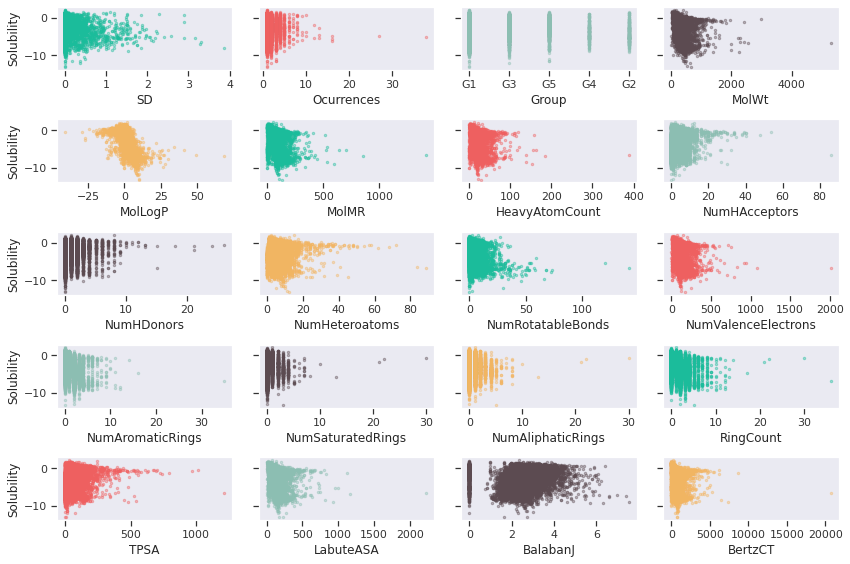

In [96]:
features_start_at = list(soldata.columns).index('Solubility') + 1
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=5, ncols=4, sharey=True, figsize=(12, 8))
axs = axs.flatten() # don't want to think about i/j
for i,n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.Solubility, 
        s = 6, alpha=0.4,
        color = color_cycle[i % len(color_cycle)]) # add some color 
    if i % 4 == 0:
        ax.set_ylabel('Solubility')
    ax.set_xlabel(n)
plt.tight_layout()
plt.show()

It's interesting that molecular weight or hydrogen bond numbers seem to have little correlation, at least from this plot. MolLogP, which is a computed estimated related to solubility, does correlate well. You can also see that some of these features have low **variance**, meaning the value of the feature is the same for many data points (e.g., "Group").

### Linear Model

Let's begin with one of the simpliest approaches — a linear model. This is our first type of supervised learning and is rarely used due to something we'll see — the ambiguous choice of features. 

Our model will be defined by this equation:

\begin{equation}
    y = \vec{w} \cdot \vec{x} + b
\end{equation}

where $\vec{w}$ is a vector of adjustable parameters and $b$ is also adjustable. Now comes the critical question: *How do we find the adjustable parameters*? 

This question has led to thousands of papers. I will take a practical approach and skip to the modern answer: we pick a **loss** function and minimize it. 

## Cited References

```{bibliography} references.bib
```